In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', 10)

from LeNetModel import *
import theano.tensor as T

from scipy.misc import imread, imresize

from ipywidgets import FloatProgress
from IPython.display import display

from time import time
import datetime

/Users/johnstamford/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
working_folder = '../Data/LapsitData/'

In [3]:
df = pd.read_csv(working_folder + '/data.csv')
df

,Folder,File
0,cityhall,Proj4_img00000001.jpg
1,cityhall,Proj4_img00000002.jpg
2,cityhall,Proj4_img00000003.jpg
3,cityhall,Proj4_img00000004.jpg
4,cityhall,Proj4_img00000005.jpg
...,...,...
1914,steam,Proj6_img00000203.jpg
1915,steam,Proj6_img00000204.jpg
1916,steam,Proj6_img00000205.jpg
1917,steam,Proj6_img00000206.jpg


In [4]:
test = df.iloc[1150]
image_file = working_folder + "/" + test.Folder + "/" + test.File
print(image_file)

../Data/LapsitData//spurn/Proj5_img00000061.jpg


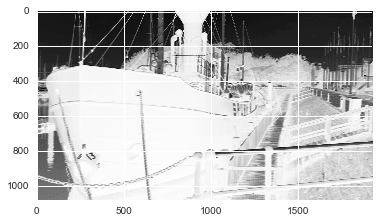

In [5]:
img = imread(image_file, mode="F")
plt.imshow(img)

In [6]:
img.shape

(1080, 1920)

In [7]:
rng = np.random.RandomState(31415)

x = T.matrix('x')
layer0_input = x.reshape((1, 1, 1080, 1920))

# Original number of kernels
nkerns=[40, 20, 1, 1, 1]

In [8]:
layer0 = LeNetConvPoolLayer(
        rng,
        input=layer0_input,
        image_shape=(1, 1, 1080, 1920),
        filter_shape=(nkerns[0], 1, 5, 5),
        poolsize=(3, 3)
    )

layer1 = LeNetConvPoolLayer(
        rng,
        input=layer0.output,
        image_shape=(1, nkerns[0], 358, 638),
        filter_shape=(nkerns[1], nkerns[0], 5, 5),
        poolsize=(3, 3)
    )

layer2 = LeNetConvPoolLayer(
        rng,
        input=layer1.output,
        image_shape=(1, nkerns[1], 118, 211),
        filter_shape=(nkerns[2], nkerns[1], 5, 5),
        poolsize=(2, 2)
    )

layer3 = LeNetConvPoolLayer(
        rng,
        input=layer2.output,
        image_shape=(1, nkerns[2], 57, 103),
        filter_shape=(nkerns[3], nkerns[2], 5, 5),
        poolsize=(2, 2)
    )

layer4 = LeNetConvPoolLayer(
        rng,
        input=layer3.output,
        image_shape=(1, nkerns[3], 26, 49),
        filter_shape=(nkerns[4], nkerns[3], 5, 5),
        poolsize=(2, 2)
    )


layer0_test = theano.function([x], layer0.output)
layer1_test = theano.function([x], layer1.output)
layer2_test = theano.function([x], layer2.output)
layer3_test = theano.function([x], layer3.output)
layer4_test = theano.function([x], layer4.output)

In [45]:
test = df.iloc[400]
image_file = working_folder + "/" + test.Folder + "/" + test.File
print(image_file)
img = imread(image_file, mode="F")

image_out = layer3_test(img)

../Data/LapsitData//deep1/Proj12_img00000192.jpg


In [46]:
image_out.shape

(1, 1, 26, 49)

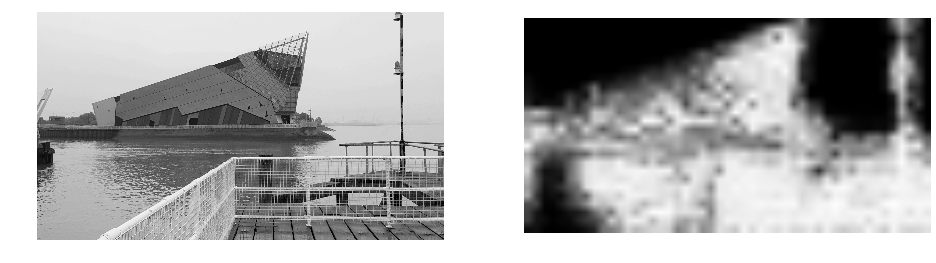

In [48]:
plt.figure(figsize=(16,32))
plt.subplot(121)
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.subplot(122)
plt.imshow(image_out[0][0], cmap='Greys_r')
plt.axis('off')
image_out.reshape([1,image_out.shape[2]*image_out.shape[3]]).shape

#plt.savefig('CNN Outputs.pdf')

# Run the Model

In [28]:
df

,Folder,File
0,cityhall,Proj4_img00000001.jpg
1,cityhall,Proj4_img00000002.jpg
2,cityhall,Proj4_img00000003.jpg
3,cityhall,Proj4_img00000004.jpg
4,cityhall,Proj4_img00000005.jpg
...,...,...
1914,steam,Proj6_img00000203.jpg
1915,steam,Proj6_img00000204.jpg
1916,steam,Proj6_img00000205.jpg
1917,steam,Proj6_img00000206.jpg


In [29]:
26*49

1274

In [30]:

new_n_feat = 26*49

# A new dataframe to store the new data
newData = pd.DataFrame(columns=range(1,new_n_feat))
newData['Class'] = np.nan
newData.shape

(0, 1274)

In [31]:
df.shape[0]

1919

In [32]:
maxCount = df.shape[0]
t0 = time()

f = FloatProgress(min=0, max=maxCount)
display(f)

count = 0

for i in df.index.values:
    global new_n_feat
    #print(data.iloc[i].img)
    file_name = df.iloc[i].File
    folder_name = df.iloc[i].Folder
    
    
    image_file = working_folder + "/" + folder_name + "/" + file_name
    
    img = imread(image_file, mode="F")
    #print(image_file)
    
    img_out = layer3_test(img)
    
    # Add the new row
    # Add the new row
    #print(img_out.shape)
    
    value = img_out.reshape([1,new_n_feat])
    value = pd.DataFrame(value)
    value['Class'] = folder_name
    value.shape

    newData = newData.append(value)
    
    count = count + 1
    f.value = count
    f.description = str(count) + "/" + str(maxCount)

t1 = time()
print("Completed Time %i in %.2f sec" % ( maxCount, (t1 - t0)))

Completed Time 1919 in 3744.78 sec


In [33]:
# Save the data
ts = time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H-%M-%S')

#newData.to_csv("Data/Output " + st + ".csv", index=False)